In [1]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [2]:
data = pd.read_csv('/Users/luismoreira/Desktop/Final_project/Databases/missing_cloud_cover.csv')

In [3]:
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
data.head()

,Phov,Elevation,long_bins,lat_bins,Inclination,lat_leftend,lat_rightend,long_leftend,long_rightend,Coordinates,Address,County
0,1649.0002,155.476274,"(-9.496, -9.404]","(38.767, 38.845]",6.416667,38.767,38.845,-9.508,-9.415,"38.767,-9.508","Arribas Direitas, Colares, Sintra, Lisboa, 270...",Lisboa
1,1654.1453,83.547421,"(-9.404, -9.312]","(38.689, 38.767]",7.000000,38.689,38.767,-9.415,-9.323,"38.689,-9.415","Marina de Cascais, Avenida Rei Humberto II de ...",Lisboa
2,1634.1395,186.357420,"(-9.404, -9.312]","(38.767, 38.845]",6.777778,38.767,38.845,-9.415,-9.323,"38.767,-9.415","Torgas, Sintra, Lisboa, 2714 - 511, Portugal",Lisboa
3,1634.9681,139.481740,"(-9.404, -9.312]","(38.845, 38.922]",5.777778,38.845,38.922,-9.415,-9.323,"38.845,-9.415","Pernigem, São João das Lampas e Terrugem, Sint...",Lisboa
4,1611.8870,122.346542,"(-9.404, -9.312]","(38.922, 39.0]",6.000000,38.922,39.000,-9.415,-9.323,"38.922,-9.415","Estrada de São Julião, São João das Lampas e T...",Lisboa


# Precipitation

In [5]:
precipitation = pd.read_csv('/Users/luismoreira/Documents/PyCharm/solar_farm/precipitation.csv')

In [6]:
precipitation

,lat,long,value
0,37.0,-9.0,38.884333
1,37.0,-8.8,40.618944
2,37.0,-8.0,45.190685
3,37.0,-7.8,47.267981
4,37.2,-8.8,47.415944
...,...,...,...
252,42.0,-8.4,147.152981
253,42.0,-8.2,96.338963
254,42.0,-7.2,93.089389
255,42.0,-7.0,104.255222


In [7]:
#pd.merge(left = data, right = )

In [8]:
locator = Nominatim(user_agent="myGeocoder", timeout=20)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [9]:
precipitation['coordinates'] = precipitation['lat'].map(str) + ',' + precipitation['long'].map(str)

precipitation['Address'] = precipitation['coordinates'].apply(rgeocode)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('37.0,-9.0',), **{}).
Traceback (most recent call last):
  File "/opt/anaconda3/envs/solar/lib/python3.9/site-packages/geopy/geocoders/base.py", line 355, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/opt/anaconda3/envs/solar/lib/python3.9/urllib/request.py", line 517, in open
    response = self._open(req, data)
  File "/opt/anaconda3/envs/solar/lib/python3.9/urllib/request.py", line 534, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +
  File "/opt/anaconda3/envs/solar/lib/python3.9/urllib/request.py", line 494, in _call_chain
    result = func(*args)
  File "/opt/anaconda3/envs/solar/lib/python3.9/urllib/request.py", line 1389, in https_open
    return self.do_open(http.client.HTTPSConnection, req,
  File "/opt/anaconda3/envs/solar/lib/python3.9/urllib/request.py", line 1350, in do_open
    r = h.getresponse()
  File "/opt/anaconda3/envs/solar/lib/python3.

In [10]:
precipitation


,lat,long,value,coordinates,Address
0,37.0,-9.0,38.884333,"37.0,-9.0","(Sagres, Vila do Bispo, Faro, 6850-350, Portug..."
1,37.0,-8.8,40.618944,"37.0,-8.8","(Portugal, (40.0332629, -7.8896263))"
2,37.0,-8.0,45.190685,"37.0,-8.0","(Ilha de Faro, Montenegro, Faro, 8001-701, Por..."
3,37.0,-7.8,47.267981,"37.0,-7.8","(Fuzeta, Moncarapacho e Fuseta, Olhão, Faro, 8..."
4,37.2,-8.8,47.415944,"37.2,-8.8","(Bordeira, Aljezur, Faro, 8670-230, Portugal, ..."
...,...,...,...,...,...
252,42.0,-8.4,147.152981,"42.0,-8.4","(Sernades, Merufe, Monção, Viana do Castelo, 4..."
253,42.0,-8.2,96.338963,"42.0,-8.2","(Branda de Chã da Matança, EM 202, Gavieira, A..."
254,42.0,-7.2,93.089389,"42.0,-7.2","(Fonte de Gatos, San Lourenzo de Pentes, A Gud..."
255,42.0,-7.0,104.255222,"42.0,-7.0","(Santigoso, A Mezquita, Viana, Ourense, Galici..."


In [11]:
addresses = []


for item in list(precipitation['Address']):
        addresses.append(item.raw)

In [12]:
"""
county = []
drop = []

for dic in addresses:
    if 'county' in dic['address']:
        county.append(dic['address']['county'])
    else:
        drop.append(i)
        
"""

"\ncounty = []\ndrop = []\n\nfor dic in addresses:\n    if 'county' in dic['address']:\n        county.append(dic['address']['county'])\n    else:\n        drop.append(i)\n        \n"

In [13]:
clean = []
for dic in addresses:
    clean.append(dic['address'])

In [14]:
counties = []
for item in clean:
    if 'county' in item:
        counties.append(item['county'])
    else:
        counties.append(None)

In [15]:
precipitation['counties'] = counties

In [16]:
precipitation.shape

(257, 6)

In [17]:
precipitation = precipitation.dropna()

In [18]:
precipitation.columns

Index(['lat', 'long', 'value', 'coordinates', 'Address', 'counties'], dtype='object')

In [19]:
precipitation.drop(['coordinates', 'Address'], axis=1)




,lat,long,value,counties
0,37.0,-9.0,38.884333,Faro
2,37.0,-8.0,45.190685,Faro
3,37.0,-7.8,47.267981,Faro
4,37.2,-8.8,47.415944,Faro
5,37.2,-8.6,52.314685,Faro
...,...,...,...,...
251,42.0,-8.6,121.674296,Viana do Castelo
252,42.0,-8.4,147.152981,Viana do Castelo
253,42.0,-8.2,96.338963,Viana do Castelo
254,42.0,-7.2,93.089389,Viana


In [20]:
precipitation_grouped = precipitation.groupby('counties').agg({'value': 'mean'})

In [21]:
precipitation_grouped

,value
counties,
Aveiro,102.222881
Beja,45.520729
Braga,126.451698
Bragança,61.030068
Castelo Branco,73.178816
Coimbra,85.006633
Costa Occidental,38.520907
Faro,51.199830
Guarda,70.860138


In [22]:
precipitation[precipitation['counties'] == 'Viana']['counties'] 

254    Viana
255    Viana
Name: counties, dtype: object

In [23]:
precipitation.iloc[244:246]['counties'] = 'Viana do Castelo'

/var/folders/mg/hz10g1l14916bvkqvy7r1fg40000gn/T/ipykernel_1401/2324776722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation.iloc[244:246]['counties'] = 'Viana do Castelo'


In [24]:
precipitation.iloc[244:246]

,lat,long,value,coordinates,Address,counties
254,42.0,-7.2,93.089389,"42.0,-7.2","(Fonte de Gatos, San Lourenzo de Pentes, A Gud...",Viana do Castelo
255,42.0,-7.0,104.255222,"42.0,-7.0","(Santigoso, A Mezquita, Viana, Ourense, Galici...",Viana do Castelo


In [25]:
precipitation_merging = precipitation.drop(['coordinates','Address'], axis = 1)

complete = pd.merge(left=data, right=precipitation_grouped, left_on='County', right_on='counties')




In [26]:
complete.columns

Index(['Phov', 'Elevation', 'long_bins', 'lat_bins', 'Inclination',
       'lat_leftend', 'lat_rightend', 'long_leftend', 'long_rightend',
       'Coordinates', 'Address', 'County', 'value'],
      dtype='object')

In [27]:
complete.columns = ['Phov', 'Elevation', 'long_bins', 'lat_bins', 'Inclination',
       'lat_leftend', 'lat_rightend', 'long_leftend', 'long_rightend',
       'Coordinates', 'Address', 'County', 'Precipitation']

In [28]:
complete2 = complete[[ 'long_bins', 'lat_bins',
       'lat_leftend', 'lat_rightend', 'long_leftend', 'long_rightend',
       'Coordinates', 'Address', 'County', 'Elevation', 'Inclination', 'Precipitation','Phov']]

In [29]:
complete_filtered = complete2[['County', 'Elevation', 'Inclination', 'Precipitation', 'Phov']]

In [30]:
complete_filtered

,County,Elevation,Inclination,Precipitation,Phov
0,Lisboa,155.476274,6.416667,60.701833,1649.0002
1,Lisboa,83.547421,7.000000,60.701833,1654.1453
2,Lisboa,186.357420,6.777778,60.701833,1634.1395
3,Lisboa,139.481740,5.777778,60.701833,1634.9681
4,Lisboa,122.346542,6.000000,60.701833,1611.8870
...,...,...,...,...,...
1308,Bragança,550.602953,7.000000,61.030068,1593.7318
1309,Bragança,553.193473,7.000000,61.030068,1591.1102
1310,Bragança,615.346908,7.000000,61.030068,1593.5859
1311,Bragança,664.804973,7.000000,61.030068,1592.8030


# ML

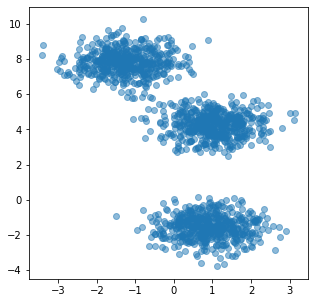

In [31]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt

n_samples = 1500

X = complete_filtered[['County', 'Elevation', 'Inclination', 'Precipitation']]

y = complete_filtered['Phov']

X, y = datasets.make_blobs(n_samples= n_samples, centers=3, cluster_std=0.7,n_features=3, random_state=0)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], alpha = 0.5)
plt.show()

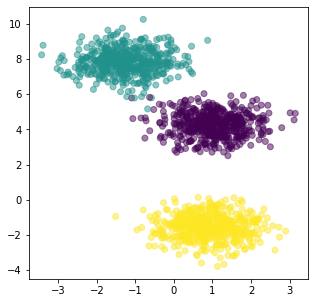

In [32]:
kmeans = cluster.KMeans(n_clusters=3)

kmeans.fit(X)

pred = kmeans.predict(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], c=pred, alpha=0.5)
plt.show()

In [33]:
# Supervised Learning